Bone Marrow Transplants in Children 
=====
A Classification Analysis
----
**Source:** Survival Prediction of Children Undergoing Hematopoietic Stem Cell Transplantation 
        doi:https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9527434/
        https://archive.ics.uci.edu/ml/datasets/Bone+marrow+transplant%3A+children

Introduction
----

Bone Marrow is the tissue that is located inside of our bones and is responsible for creating red blood cells, and our immune cells (including both innate and adaptive immune cells). Because of its importance in normal human everyday function, bone marrow disorders are an increasingly common and often debilitating or deadly diagnosis for patients to live with. However, bone marrow transplants are a surgical treatment which replaces old dysfunctional bone marrow (of the recipient) with the bone marrow of a donor. This allow the recipient to recover from their previous disease, dependent on a lack of life threatening side effects and successful completion of the procedure. Key factors that might influence the success of a bone marrow transplant include age, body mass, HLA mismatch, and genetics. Key indicators of the success of the transplant also include the time it takes for neutrophil (immune cells) and red blood cells to recover. Using the Bone marrow transplant: children Data Set we aim to answer will a patient, given key information relating to their bone marrow transplant procedure, undergo a relapse? This dataset contains information on all the key factors relating to the success of a transplant listed above as well as the key indicators and transplant success.

In [27]:
library(tidyverse)
library(tidymodels)
library(repr) 
library(gridExtra)
set.seed(69)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




Step 1: Read in the Data
---

In [2]:

bone_marrow_transplant_data <- read.table("https://archive.ics.uci.edu/ml/machine-learning-databases/00565/bone-marrow.arff", 
                                          skip =109, sep=",", col.names = c(" Recipientgender {1,0}", 
"Stemcellsource","donor.age","Donorage35","IIIV","Gendermatch","DonorABO","RecipientABO {1,-1,2,0}" ,"RecipientRh {1,0}" ,
"ABOmatch {0,1}" ,"CMVstatus" ,"DonorCMV" ,"RecipientCMV" ,"Disease {ALL,AML,chronic,nonmalignant,lymphoma}" ,
"Riskgroup {1,0}" ,"Txpostrelapse {0,1}" ,"Diseasegroup {1,0}" ,"HLAmatch" ,"HLAmismatch" ,"Antigen" ,"Allel" ,
"HLAgrI" ,"Recipientage" ,"Recipientage10 {0,1}" ,"Recipientageint {0,1,2}" ,"Relapse" ,"aGvHDIIIIV {0,1}" ,"extcGvHD {1,0}" ,
"CD34kgx10d6_numeric" ,"CD3dCD34_numeric" ,"CD3dkgx10d8_numeric" ,"Rbodymass" ,"ANCrecovery" ,"PLTrecovery" ,"time_to_aGvHD_III_IV numeric" ,
"survival_time numeric" ,"survival_status numeric"))

head(bone_marrow_transplant_data)

,X.Recipientgender..1.0.,Stemcellsource,donor.age,Donorage35,IIIV,Gendermatch,DonorABO,RecipientABO..1..1.2.0.,RecipientRh..1.0.,ABOmatch..0.1.,⋯,extcGvHD..1.0.,CD34kgx10d6_numeric,CD3dCD34_numeric,CD3dkgx10d8_numeric,Rbodymass,ANCrecovery,PLTrecovery,time_to_aGvHD_III_IV.numeric,survival_time.numeric,survival_status.numeric
,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>
1,1,0,23.34247,0,1,0,-1,-1,1,0,⋯,1,4.50,11.078295,0.41,20.6,16,37,1000000,163,1
2,1,0,26.39452,0,1,0,-1,-1,1,0,⋯,1,7.94,19.01323,0.42,23.4,23,20,1000000,435,1
3,0,0,39.68493,1,1,0,1,2,1,1,⋯,?,4.25,29.481647,0.14,50,23,29,19,53,1
4,0,1,33.35890,0,0,0,1,2,0,1,⋯,1,51.85,3.972255,13.05,9,14,14,1000000,2043,0
5,1,0,27.39178,0,0,0,2,0,1,1,⋯,1,3.27,8.412758,0.39,40,16,70,1000000,2800,0
6,0,1,34.52055,0,1,0,0,1,0,1,⋯,?,17.78,2.406248,7.39,51,17,29,18,41,1


Step 2: Clean and Wrangle Data into Tidy Format (and choose which columns we need to use for analysis)
-----


**Class that we are Prediciting**

Relapse = Did the patient relapse (meaning did the disease reoccour after transplant) 

**Rational Behind Choosing These Variables**

donor.age = The age of the donor has an impact on the health of the HPCs which can have an effect on the transplant sucesses and therefore the chance of relapse 

HLAmatch = MHC match between host and donor (low value is a better match so will support a better acceptance of the transplant)

Antigen = in how many antigens there are differences between the host and donor (no differences at -1, larger numbers are more differences)

Allel = in how many allels there are differences between the host and donor (no differences at -1, larger numbers are more differences)

Recipientage = Age of the recipient of hematopoietic stem cells at the time of transplantation. 

Rbodymass = Body mass of the recipient of hematopoietic stem cells at the time of transplantation

ANCrecovery = Time to neutrophils recovery defined as neutrophils count (per L) (note: this is important as neutrophils are derived from the myloid progenerators that are derived from the HPC cells that are included in bone marrow transplants)

PLTrecovery = Time to platelet recovery defined as platelet count (per mm3)


In [3]:
#select for columns 
cut_transplant_data <- bone_marrow_transplant_data |>
    select(donor.age, HLAmatch, Antigen, Allel, Recipientage, Relapse, Rbodymass, ANCrecovery, PLTrecovery)
head(cut_transplant_data)

#mutate columns to factor data type
clean_transplant_data <- cut_transplant_data |>
    mutate(Antigen = as.numeric(Antigen), Allel = as.numeric(Allel), Rbodymass = as.numeric(Rbodymass))
head(clean_transplant_data)

,donor.age,HLAmatch,Antigen,Allel,Recipientage,Relapse,Rbodymass,ANCrecovery,PLTrecovery
,<dbl>,<int>,<chr>,<chr>,<dbl>,<int>,<chr>,<int>,<int>
1,23.34247,0,-1,-1,4.0,1,20.6,16,37
2,26.39452,0,-1,-1,6.6,1,23.4,23,20
3,39.68493,0,-1,-1,18.1,0,50,23,29
4,33.35890,1,1,0,1.3,0,9,14,14
5,27.39178,0,-1,-1,8.9,0,40,16,70
6,34.52055,0,-1,-1,14.4,0,51,17,29


Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


,donor.age,HLAmatch,Antigen,Allel,Recipientage,Relapse,Rbodymass,ANCrecovery,PLTrecovery
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>
1,23.34247,0,-1,-1,4.0,1,20.6,16,37
2,26.39452,0,-1,-1,6.6,1,23.4,23,20
3,39.68493,0,-1,-1,18.1,0,50.0,23,29
4,33.35890,1,1,0,1.3,0,9.0,14,14
5,27.39178,0,-1,-1,8.9,0,40.0,16,70
6,34.52055,0,-1,-1,14.4,0,51.0,17,29


In [4]:
#splitting data into training and testing sets
transplant_data_split <-  initial_split(clean_transplant_data, prop = 0.75, strata = Relapse)
transplant_train <- training(transplant_data_split)
transplant_test <- testing(transplant_data_split)
head(transplant_train)
head(transplant_test)

,donor.age,HLAmatch,Antigen,Allel,Recipientage,Relapse,Rbodymass,ANCrecovery,PLTrecovery
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>
3,39.68493,0,-1,-1,18.1,0,50.0,23,29
4,33.35890,1,1,0,1.3,0,9.0,14,14
7,21.43562,3,1,2,18.2,0,56.0,22,58
8,32.64110,0,-1,-1,7.9,0,20.5,15,14
10,29.73151,1,0,1,1.9,0,10.5,12,13
11,36.80000,2,1,1,13.4,0,47.0,11,16


,donor.age,HLAmatch,Antigen,Allel,Recipientage,Relapse,Rbodymass,ANCrecovery,PLTrecovery
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>
1,23.34247,0,-1,-1,4.0,1,20.6,16,37
5,27.39178,0,-1,-1,8.9,0,40.0,16,70
6,34.52055,0,-1,-1,14.4,0,51.0,17,29
9,28.78356,1,0,1,4.7,0,16.5,16,17
13,30.60274,0,-1,-1,11.5,1,42.0,20,48
14,30.67671,0,-1,-1,17.8,0,55.0,16,16


Step 3: Visulizing the Data
====
Note: This is using only the training data

In [5]:
names <- c("Mean", "Median") 
mean <- transplant_train |>
    map_df(mean, na.rm = TRUE)  #can we get the big patelet recovery numbers out??
median <- transplant_train |>
    map_df(median, na.rm = TRUE)
# count <- transplant_train |>      HOW DO WE DO THIS
tbl1 <- bind_rows(mean, median)
exploratory_analysis <- bind_cols(names, tbl1)
exploratory_analysis

New names:
• `` -> `...1`


...1,donor.age,HLAmatch,Antigen,Allel,Recipientage,Relapse,Rbodymass,ANCrecovery,PLTrecovery
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mean,33.31160,0.7410072,0.03623188,-0.1884058,10.05683,0.1510791,35.78949,28791.98,100749.8
Median,33.55069,1.0000000,0.00000000,0.0000000,9.90000,0.0000000,33.00000,15.00,21.0


**Table 1: Mean, median and Count of all variables involved in prediciting relapse**

Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”


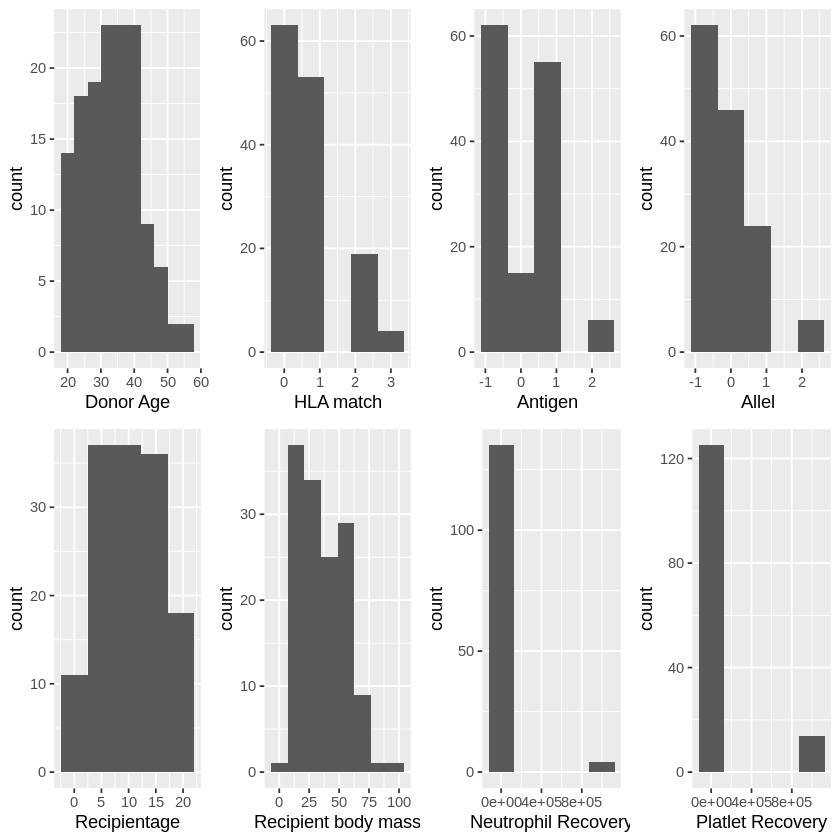

In [42]:
#add a figure decription 

donor_age_distribution <- transplant_train |>
    ggplot() +
    geom_histogram(binwidth = 4, aes(x=donor.age)) +
    labs(x="Donor Age")

HLAmatch_distribution <- transplant_train |>
    ggplot() +
    geom_histogram(bins = 5, aes(x=HLAmatch)) +
    labs(x="HLA match") 

Antigen_distribution <- transplant_train |>
    ggplot() +
    geom_histogram(bins = 5,aes(x=Antigen)) +
    labs(x="Antigen") 

Allel_distribution <- transplant_train |>
    ggplot() +
    geom_histogram(bins = 5,aes(x=Allel)) +
    labs(x="Allel") 

Recipientage_distribution <- transplant_train |>
    ggplot() +
    geom_histogram(bins = 5 ,aes(x=Recipientage)) +
    labs(x="Recipientage") 

Rbodymass_distribution <- transplant_train |>
    ggplot() +
    geom_histogram(bins = 8,aes(x=Rbodymass)) +
    labs(x="Recipient body mass") 

ANCrecovery_distribution <- transplant_train |>
    ggplot() +
    geom_histogram(bins = 5,aes(x=ANCrecovery)) +
    labs(x="Neutrophil Recovery") 

PLTrecovery_distribution <- transplant_train |>
    ggplot() +
    geom_histogram(bins = 5,aes(x=PLTrecovery)) +
    labs(x="Platlet Recovery") 

grid.arrange(donor_age_distribution,HLAmatch_distribution,Antigen_distribution, Allel_distribution, Recipientage_distribution, Rbodymass_distribution, ANCrecovery_distribution, PLTrecovery_distribution, ncol =4)

**Table 2**: Distributions of predictor variables used in annalysis